In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data/distances.csv')
df.head()

,Unnamed: 0,Start,Target,Distance
0,0,Aberdeen,Aberdeen,0
1,1,Aberdeen,Adelaide,16192
2,2,Aberdeen,Algiers,2291
3,3,Aberdeen,Amsterdam,696
4,4,Aberdeen,Ankara,3158


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Start,Target,Distance
0,Aberdeen,Aberdeen,0
1,Aberdeen,Adelaide,16192
2,Aberdeen,Algiers,2291
3,Aberdeen,Amsterdam,696
4,Aberdeen,Ankara,3158


In [5]:
cities = df['Start'].unique()
print(cities)

['Aberdeen' 'Adelaide' 'Algiers' 'Amsterdam' 'Ankara' 'Asuncin' 'Athens'
 'Auckland' 'Bangkok' 'Barcelona' 'Beijing' 'Belm' 'Belfast' 'Belgrade'
 'Berlin' 'Birmingham' 'Bogot' 'Bombay' 'Bordeaux' 'Bremen' 'Brisbane'
 'Bristol' 'Brussels' 'Bucharest' 'Budapest' 'Buenos Aires' 'Cairo'
 'Calcutta' 'Canton' 'Cape Town' 'Caracas' 'Cayenne' 'Chihuahua'
 'Chongqing' 'Copenhagen' 'Crdoba' 'Dakar' 'Darwin' 'Djibouti' 'Dublin'
 'Durban' 'Edinburgh' 'Frankfurt' 'Georgetown' 'Glasgow' 'Guatemala City'
 'Guayaquil' 'Hamburg' 'Hammerfest' 'Havana' 'Helsinki' 'Hobart'
 'Hong Kong' 'Iquique' 'Irkutsk' 'Jakarta' 'Johannesburg' 'Kingston'
 'Kinshasa' 'Kuala Lumpur' 'La Paz' 'Leeds' 'Lima' 'Lisbon' 'Liverpool'
 'London' 'Lyons' 'Madrid' 'Manchester' 'Manila' 'Marseilles' 'Mazatln'
 'Mecca' 'Melbourne' 'Mexico City' 'Milan' 'Montevideo' 'Moscow' 'Munich'
 'Nagasaki' 'Nagoya' 'Nairobi' 'Nanjing (Nanking)' 'Naples' 'New Delhi'
 'Newcastle-on-Tyne' 'Odessa' 'Osaka' 'Oslo' 'Panama City' 'Paramaribo'
 'Paris' 

In [6]:
city_distances_dict = dict(zip(df['Start'] + df['Target'], df['Distance']))
city_distances_dict

{'AberdeenAberdeen': 0,
 'AberdeenAdelaide': 16192,
 'AberdeenAlgiers': 2291,
 'AberdeenAmsterdam': 696,
 'AberdeenAnkara': 3158,
 'AberdeenAsuncin': 10521,
 'AberdeenAthens': 2849,
 'AberdeenAuckland': 17748,
 'AberdeenBangkok': 9469,
 'AberdeenBarcelona': 1779,
 'AberdeenBeijing': 7796,
 'AberdeenBelm': 7709,
 'AberdeenBelfast': 367,
 'AberdeenBelgrade': 2076,
 'AberdeenBerlin': 1119,
 'AberdeenBirmingham': 526,
 'AberdeenBogot': 8511,
 'AberdeenBombay': 7339,
 'AberdeenBordeaux': 1374,
 'AberdeenBremen': 829,
 'AberdeenBrisbane': 16186,
 'AberdeenBristol': 632,
 'AberdeenBrussels': 817,
 'AberdeenBucharest': 2411,
 'AberdeenBudapest': 1785,
 'AberdeenBuenos Aires': 11476,
 'AberdeenCairo': 3969,
 'AberdeenCalcutta': 7948,
 'AberdeenCanton': 9267,
 'AberdeenCape Town': 10308,
 'AberdeenCaracas': 7530,
 'AberdeenCayenne': 7267,
 'AberdeenChihuahua': 8148,
 'AberdeenChongqing': 8292,
 'AberdeenCopenhagen': 918,
 'AberdeenCrdoba': 11430,
 'AberdeenDakar': 4897,
 'AberdeenDarwin': 13661,

In [7]:
len(city_distances_dict)

14400

# I use shuffle for time complexity optimization (instead of randomize each city, one at the time) Each shuffle is independent from eachother.

In [8]:
def all_cities_visited_simulation(cities, cities_dict):
    np.random.shuffle(cities)
    total_distance = 0
    start = None
    target = None
    
    for city in cities:
        if not (start):
            start = city
            continue
     
        target = city
        total_distance += cities_dict[start + target]
        start = target
        target = None
    return total_distance

In [9]:
distances = [all_cities_visited_simulation(cities, city_distances_dict) for i in range(10000)]
distances

[873542,
 991034,
 1000718,
 964672,
 1048434,
 992830,
 955175,
 981902,
 966796,
 1022706,
 927334,
 1069878,
 982912,
 915584,
 968467,
 990791,
 1026818,
 955651,
 1016108,
 1002428,
 952000,
 939624,
 921796,
 946924,
 954712,
 1000274,
 1021655,
 979167,
 1009215,
 1056604,
 954903,
 923188,
 905557,
 1017787,
 945618,
 928006,
 980544,
 959713,
 1002929,
 940441,
 916953,
 1008740,
 1025350,
 1014358,
 986996,
 1008514,
 921276,
 922170,
 1000785,
 922307,
 987110,
 1015964,
 977475,
 993855,
 999040,
 1025851,
 959967,
 969308,
 946161,
 985792,
 1006288,
 967974,
 998568,
 930730,
 965919,
 987245,
 999902,
 965308,
 1016009,
 976261,
 1003745,
 992320,
 1082680,
 1003885,
 1003833,
 1002913,
 972649,
 967602,
 991662,
 1085627,
 931539,
 1006472,
 977423,
 904144,
 1043593,
 1017297,
 980116,
 900327,
 961229,
 949873,
 1018821,
 940011,
 907998,
 945255,
 1026933,
 1000402,
 939748,
 1033027,
 909303,
 1014902,
 979919,
 1012637,
 1001831,
 938180,
 1027046,
 1028405,
 93871

In [10]:
min(distances)

818494

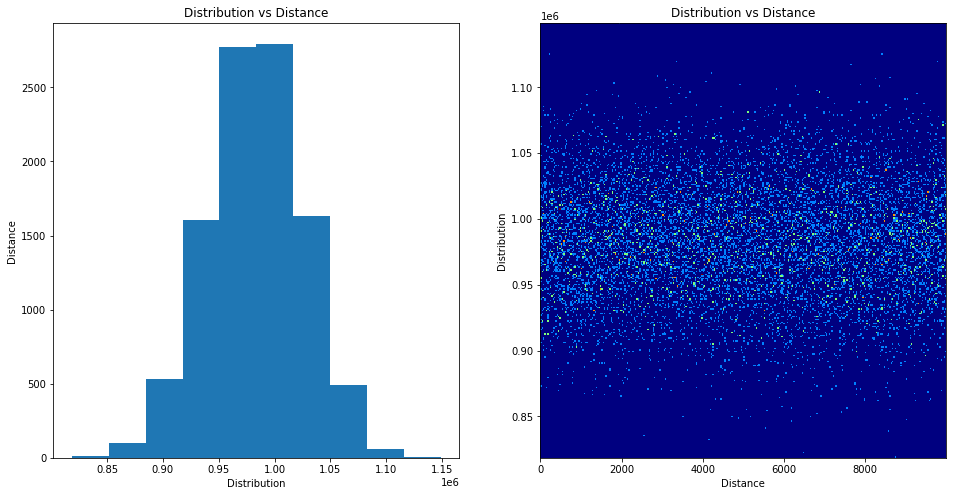

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.hist(distances)

plt.xlabel('Distribution')
plt.ylabel('Distance')
plt.title("Distribution vs Distance")

plt.subplot(1, 2, 2)
plt.hist2d([i for i in range(10000)], distances, bins=(300, 300), cmap=plt.cm.jet)
plt.xlabel('Distance')
plt.ylabel('Distribution')
plt.title("Distribution vs Distance")

plt.show()